In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def signal_generation(array_frequencies, array_amplitudes, offset, signal_duration, sample_rate):
    f = np.zeros(sample_rate)
    t = np.arange(0, 1, 1/sample_rate)
    for i in range(len(array_amplitudes)):
        f = f + array_amplitudes[i] * np.sin(2 * np.pi * array_frequencies[i] * t)
    f = offset + f
    return f

Text(0, 0.5, 'Amplitude (arb. unit)')

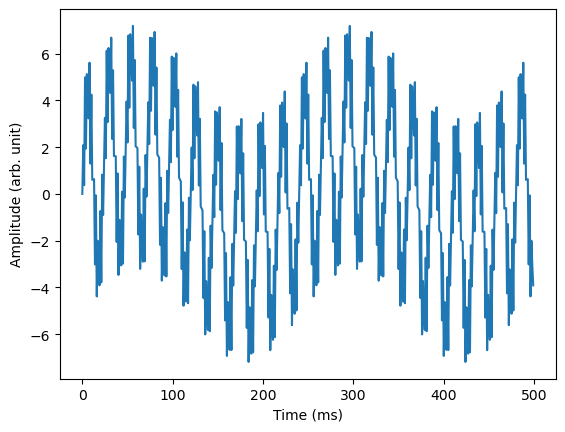

In [3]:
A = [2, 4, 2]
F = [50, 500, 5000]
sampling_freq = 12000
offset = 0
sig_duration = 1

f = signal_generation(F, A, offset, sig_duration, sampling_freq)
signal_1 = f
plt.plot(f[:500])
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (arb. unit)")

Text(0, 0.5, 'Amplitude (arb. unit)')

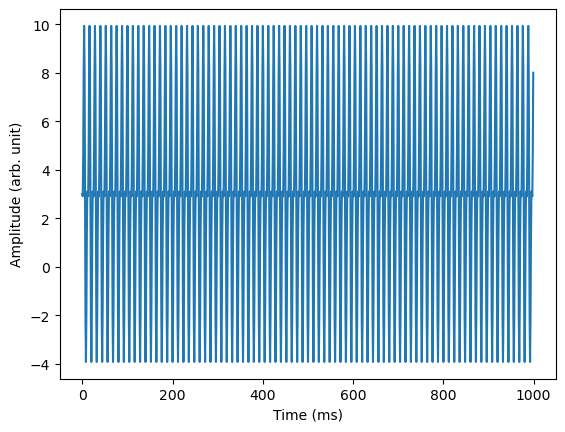

In [4]:
A = [5, 3]
F = [1000, 10000]
sampling_freq = 12000
offset = 3
sig_duration = 1

f = signal_generation(F, A, offset, sig_duration, sampling_freq)
signal_2 = f

plt.plot(f[:1000])
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (arb. unit)")

In [5]:
def single_sided_amplitude(signal, sampling_rate):
    Fast_Fourier_Transform = np.fft.fft(signal)    
    freq = np.fft.fftfreq(sampling_rate, 1.0 / sampling_rate)
    positive_frequencies = freq[:sampling_rate // 2]
    amp_spectrum = np.abs(Fast_Fourier_Transform[:sampling_rate // 2])   
    if positive_frequencies[0] == 0:
        amp_spectrum[0] = amp_spectrum[0] / 2
        
    return positive_frequencies, amp_spectrum

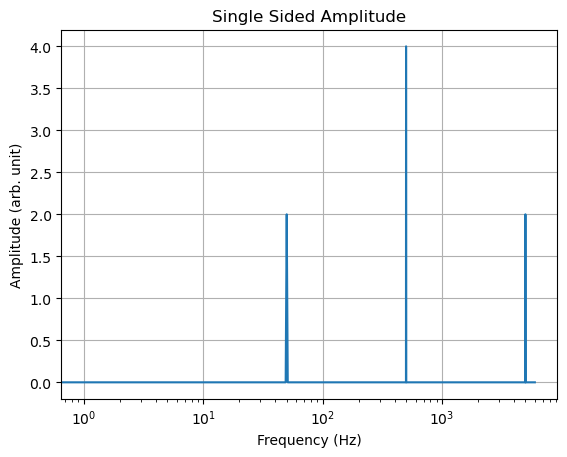

In [6]:
freq, amp_spectrum = single_sided_amplitude(signal_1, sampling_freq)
amp_spectrum = 2.0 / sampling_freq * amp_spectrum

plt.semilogx(freq, amp_spectrum)
plt.title("Single Sided Amplitude")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (arb. unit)")
plt.grid()
plt.show()

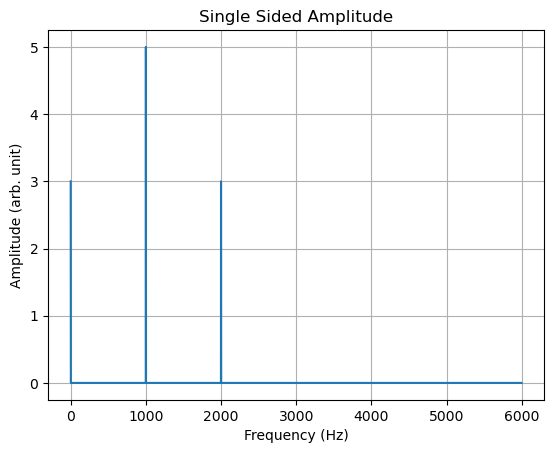

In [7]:
freq, amp_spectrum = single_sided_amplitude(signal_2, sampling_freq)
amp_spectrum = 2.0 / sampling_freq * amp_spectrum

plt.plot(freq, amp_spectrum)
plt.title("Single Sided Amplitude")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (arb. unit)")
plt.grid()
plt.show()